# Pointilism usage examples

### Explanation
The module `pointillism` contains classes to build pointillized pictures with colors taken from a source image(s).

* `image` implements a variety of methods to manipulate image and generate pointillized representations

* `pipeline` contains methods for building a workflow of image manipulations and then optionally saving gif animations

* `batch` operates on a list of images to run pointillism pipelines defined in `.gif`

In the future, support will be provided for loading movie files and saving out pointillized versions of them

### Samples
Some images and gifs I've produced can be found [here](https://photos.app.goo.gl/SAQ1DMLrkVxoyjGB3)

## Import class definitions

In [1]:
import pointillism as pt

# Usage examples

## 1) Read image, run routines to pointillize, and save result

media/images/pfieffer.jpg


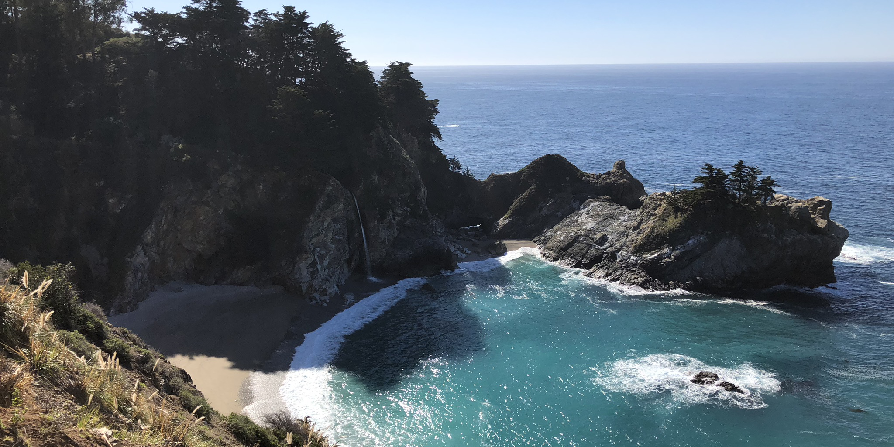

In [2]:
# Create instance of point object using an image
point = pt.image(location='media/images/pfieffer.jpg', debug = True)

# Crop
point.crop([1000,500], False)

# Display original
point.display(original=True)

In [3]:
# Plot with default argument
point.make('balanced')

done in 2.16 seconds


media/images/pfieffer.jpg


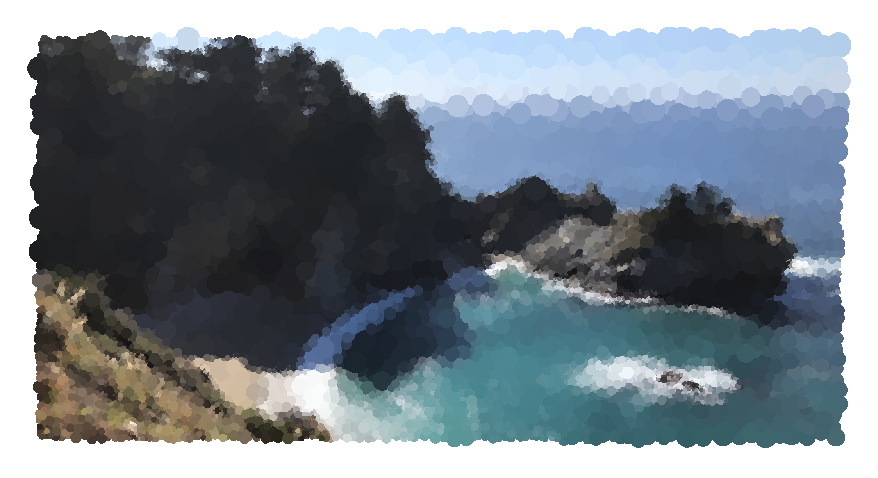

In [4]:
# Display and save
point.display()
point.save_out(location='media/images_out', suffix='basic test')

## 1b) Apply a colormap, make a new canvas, and then pointillize it

done in 3.39 seconds
media/images/pfieffer.jpg


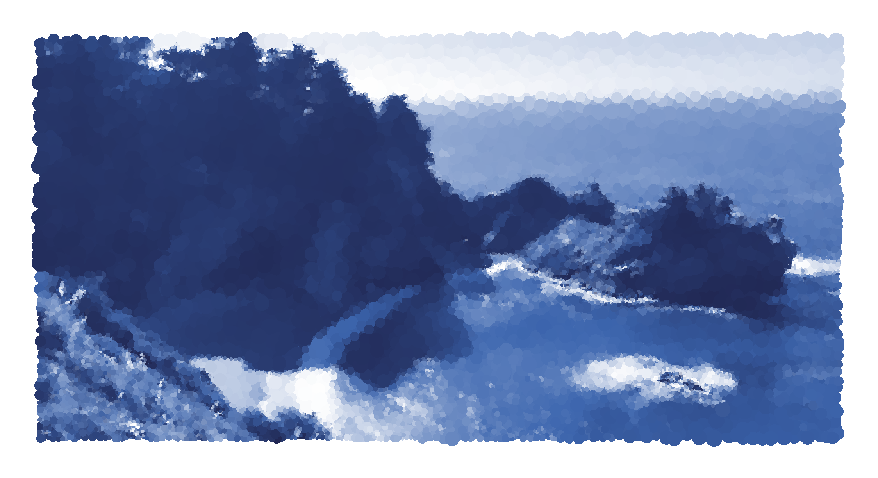

In [5]:
# Apply a colormap
point.colormap('cyanotype')

# Reset output canvas
point._newImage(border=100)

# Make and display
point.make('fine')
point.display()

done in 4.06 seconds
media/images/pfieffer.jpg


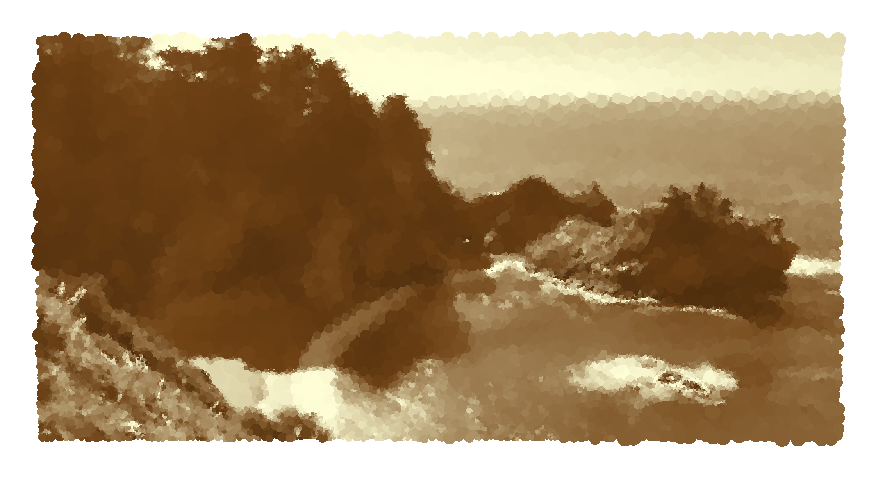

In [6]:
# Apply a colormap
point.colormap('sepia')

# Reset output canvas
point._newImage(border=100)

# Make and display
point.make('fine')
point.display()

## 2) Build image stacks using `pointillzer.gif` and save as gif of intermediate images

In [7]:
# Create instance
point = pt.pipeline(location='media/images/pfieffer.jpg', debug = True, border = 0)

# Render
point.make_gif(kind='assembly', location='media/gifs', name='animated_assembly.gif', crop=True)

Building image:  1 done


In [8]:
# Display
from IPython.display import HTML
HTML('<img src="media/gifs/animated_assembly.gif">')

## 3) Build image stacks using `pointillzer.gif` and save as gif of final images

In [9]:
# Create instance
point = pt.pipeline(location='media/images/pfieffer.jpg', debug = True, border = 0)

# Render
point.make_gif(kind='loop', location='media/gifs', name='animated_loop.gif', crop=True)

Building image:  1 2 3 4 5 6 7 8 9 10 done


In [10]:
# Display
HTML('<img src="media/gifs/animated_loop.gif">')

## 4) Build image stacks using `pointillizer.pipeline` and save as gif of multiplied images

In [11]:
# Create instance
point = pt.pipeline(location='media/images/pfieffer.jpg', debug = True, border = 0)

# Render
point.make_gif(kind='multiplier', location='media/gifs', name='animated_multiplier.gif', crop=True)

Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 done


In [12]:
HTML('<img src="media/gifs/animated_multiplier.gif">')

## 5. Bulk image processing with `pointillizer.batch`

In [13]:
import pointillism as pt

In [14]:
# Create instance on directory
point = pt.batch(location='media/images/', debug = True, border = 0)

### Images

In [15]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop, {'aspect': [1000,500], 'resize': False},1)
point.add_to_queue(point.make, {'setting': 'balanced'}, 1)

# Run and save
point.run_pile_images(location = 'media/images_out', suffix = 'bulk')

Batch processing image: 1 2 3 4 done....took 17.23 seconds


### Assembly gifs

In [16]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop, {'aspect': [1000,500], 'resize': True},1)
point.add_to_queue(point.make_gif,{'kind':'assembly', 'location':'media/gifs', 'bulk': True}, 1)

# Run and save (gifs) in assembly mode
point.run_pile_gifs(location = 'media/images_out/gifs', save_steps = True, suffix = 'bulk_assembly')

Batch processing gifs:
1 Building image:  1 done
2 Building image:  1 done
3 Building image:  1 done
4 Building image:  1 done
done....took 11.45 seconds


### Loop GIFs

In [17]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop, {'aspect': [1000,500], 'resize': True},1)
point.add_to_queue(point.make_gif,{'kind':'loop', 'location':'media/gifs', 'bulk': True}, 1)
                   
# Run and save (gifs) in loop mode
point.run_pile_gifs(location = 'media/images_out/gifs', suffix = 'bulk_loop')

Batch processing gifs:
1 Building image:  1 2 3 4 5 6 7 8 9 10 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 done
done....took 60.01 seconds


### Multiplier gifs

In [18]:
# Crop and build queue
point.new_queue()
point.add_to_queue(point.crop, {'aspect': [1000,500], 'resize': True},1)
point.add_to_queue(point.make_gif,{'kind':'multiplier', 'location':'media/gifs', 'bulk': True}, 1)
                   
# Run and save (gifs) in multiplier mode
point.run_pile_gifs(location = 'media/images_out/gifs', suffix = 'bulk_multiplier')

Batch processing gifs:
1 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 done
2 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 done
3 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 done
4 Building image:  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 done
done....took 38.32 seconds


# Documentation

In [19]:
help(pt.image)

Help on class image in module pointillism.image:

class image(builtins.object)
 |  Base class for pointillizer
 |  
 |  Methods defined here:
 |  
 |  __init__(self, location=None, image=None, debug=False, **kwargs)
 |      Initiialize with image or directory
 |      
 |      Optional kwargs:
 |          reduce_factor=2
 |              reduces size of lookup array
 |          increase_factor=1
 |              increases size of output image
 |          queue=False
 |              instead of plotting, queues points for later plotting
 |          plot_coverage=True
 |              plots black and white mask of image coverage
 |  
 |  colormap(self, setting='cyanotype')
 |      Converts an image to a predefined or custom color palette.
 |      Setting can be 'cyanotype', 'sepia', 'noir, or 'b&w'.
 |  
 |  crop(self, aspect, resize=False, direction='height')
 |      Crops and resizes in the dimension specified ('height' or 'width')
 |  
 |  display(self, original=False, coverage=False, grad

In [20]:
help(pt.pipeline)

Help on class pipeline in module pointillism.pipeline:

class pipeline(pointillism.image.image)
 |  Subclass of pointillize for making stacks of images.
 |  Only supports single images currently
 |  
 |  Method resolution order:
 |      pipeline
 |      pointillism.image.image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args, **kwargs)
 |      Initiialize with image or directory
 |      
 |      Optional kwargs:
 |          reduce_factor=2
 |              reduces size of lookup array
 |          increase_factor=1
 |              increases size of output image
 |          queue=False
 |              instead of plotting, queues points for later plotting
 |          plot_coverage=True
 |              plots black and white mask of image coverage
 |  
 |  add_to_queue(self, method, args, n)
 |      Adds a new method to the queue, to be run with args, n times
 |  
 |  build_multipliers(self, plot_list, **kwargs)
 |      Plots the point queue repeatedly wit

In [21]:
help(pt.batch)

Help on class batch in module pointillism.batch:

class batch(pointillism.pipeline.pipeline)
 |  Subclass of pointillizeStack for operating serially on images
 |  
 |  Method resolution order:
 |      batch
 |      pointillism.pipeline.pipeline
 |      pointillism.image.image
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, location=False, *args, **kwargs)
 |      Initiialize with image or directory
 |      
 |      Optional kwargs:
 |          reduce_factor=2
 |              reduces size of lookup array
 |          increase_factor=1
 |              increases size of output image
 |          queue=False
 |              instead of plotting, queues points for later plotting
 |          plot_coverage=True
 |              plots black and white mask of image coverage
 |  
 |  display(self, **kwargs)
 |      Displays browser-size version of outputs, or original images
 |      if original=True
 |  
 |  run_pile_gifs(self, location, step_duration=0.1, **kwargs)
 |